In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load the dataset
data = pd.read_csv('wine.csv')

In [3]:
# Display the first few rows and data info
print("Dataset preview:")
print(data.head())
print("\nData Information:")
print(data.info())

Dataset preview:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1

In [4]:
# Step 1: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


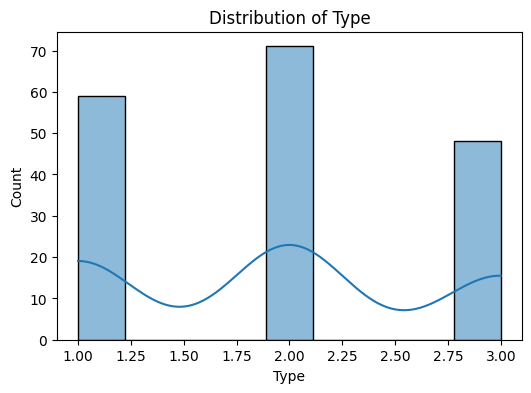

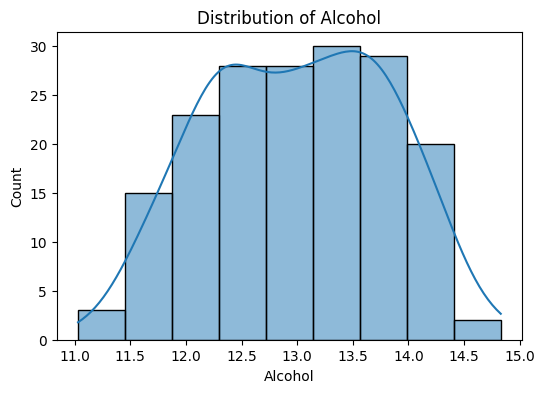

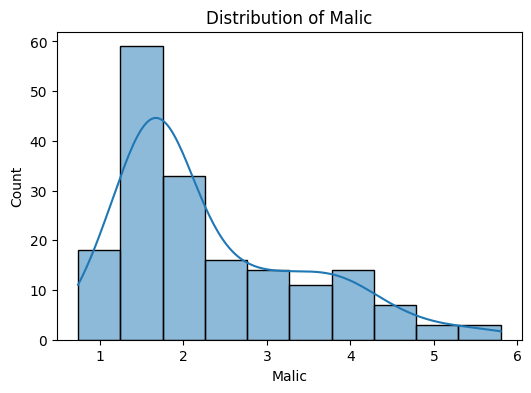

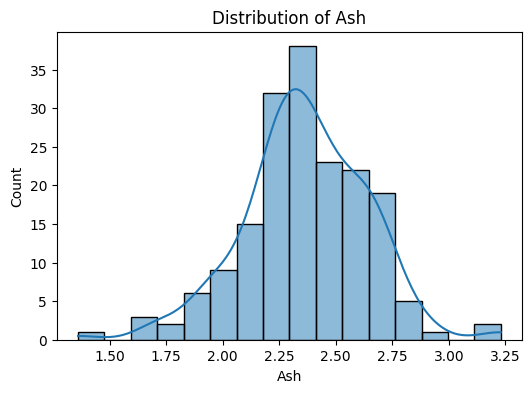

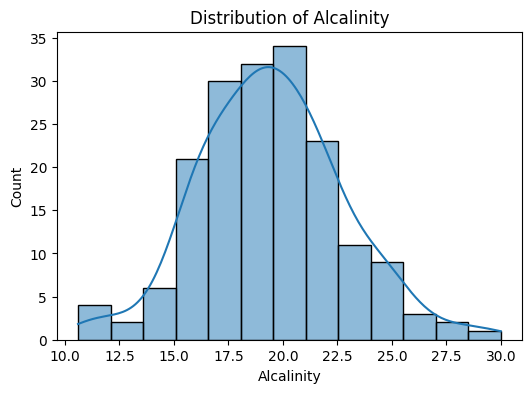

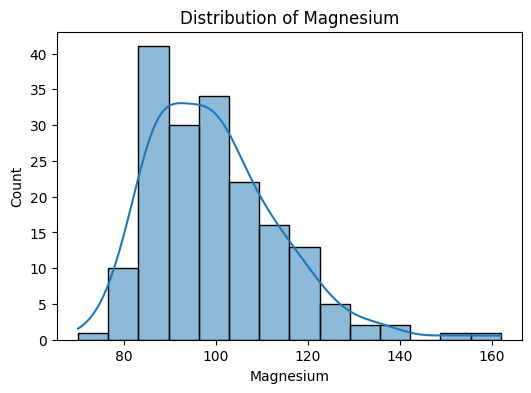

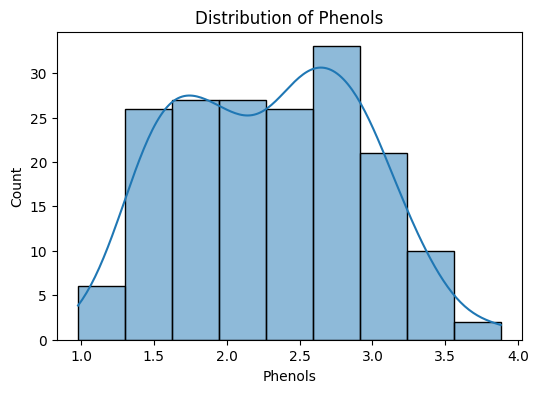

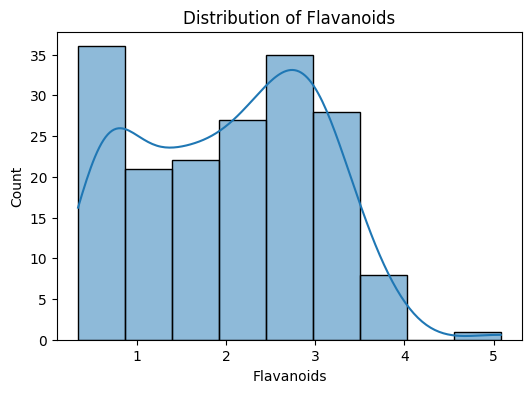

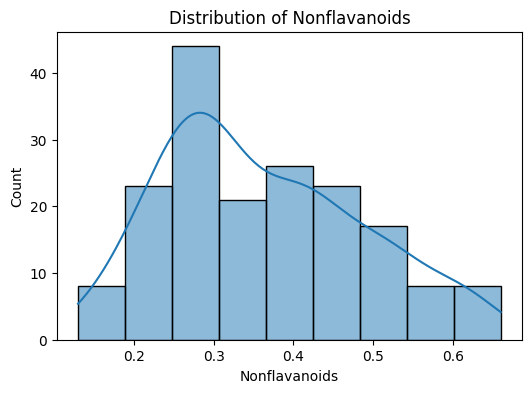

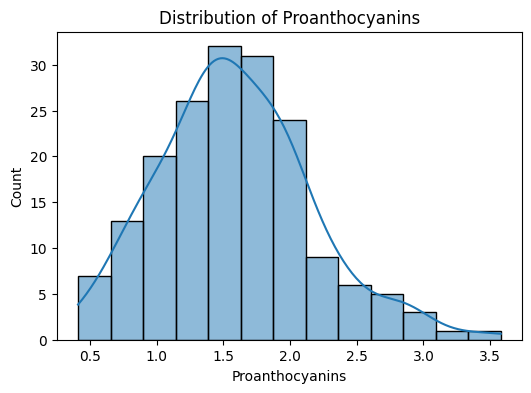

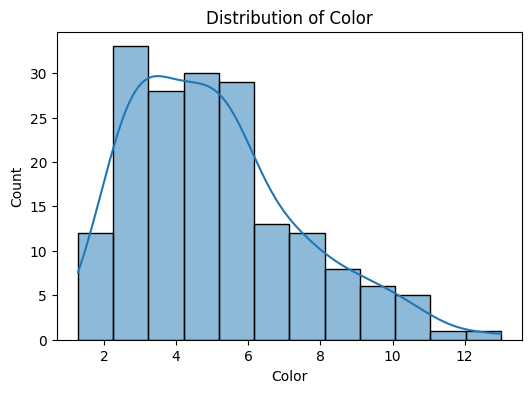

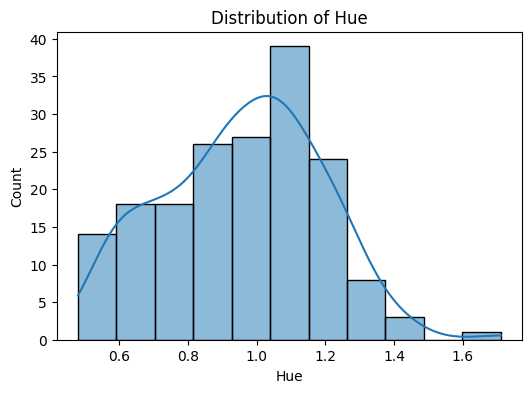

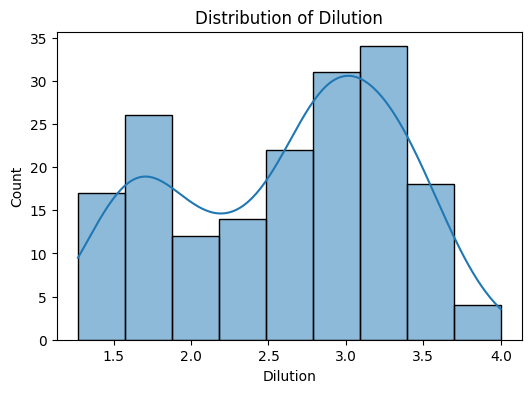

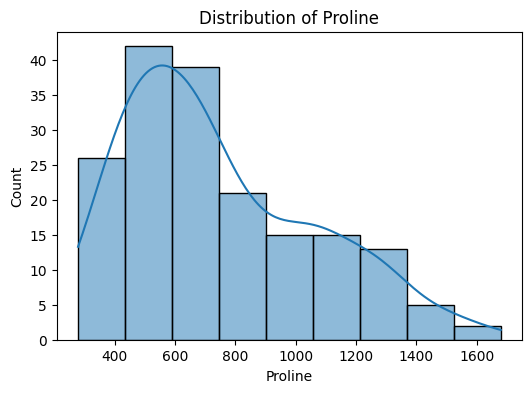

In [5]:
# Distribution Analysis
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

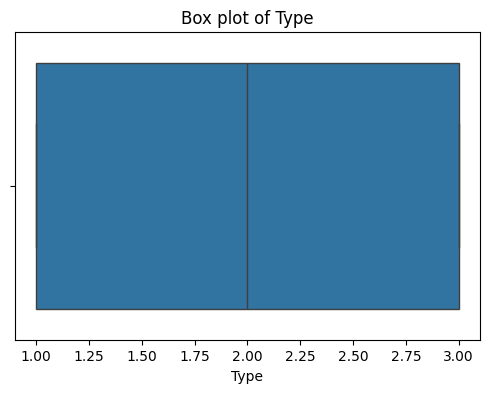

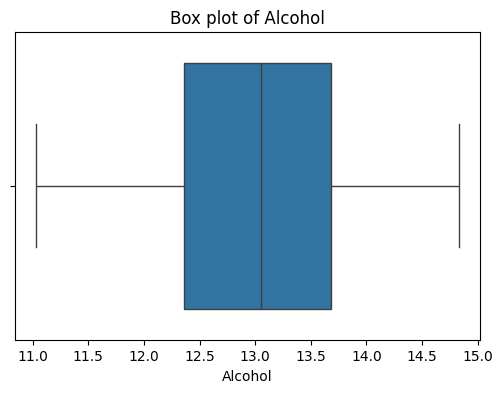

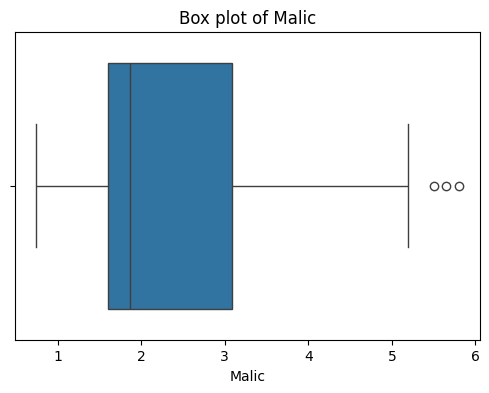

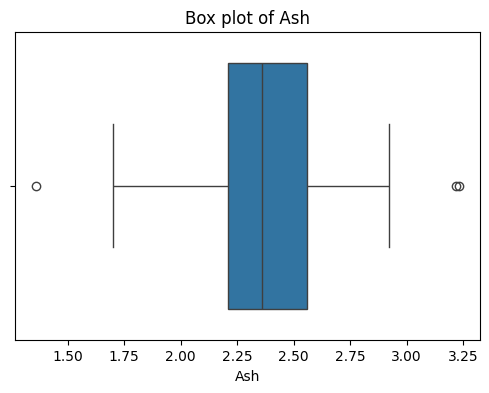

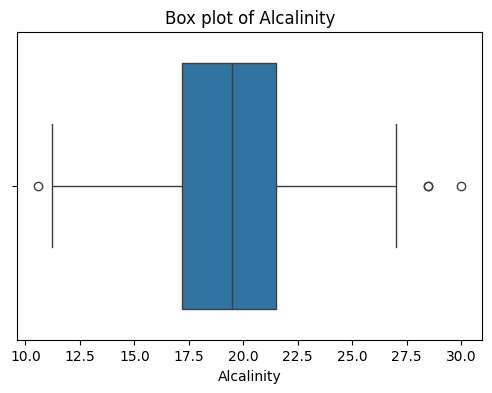

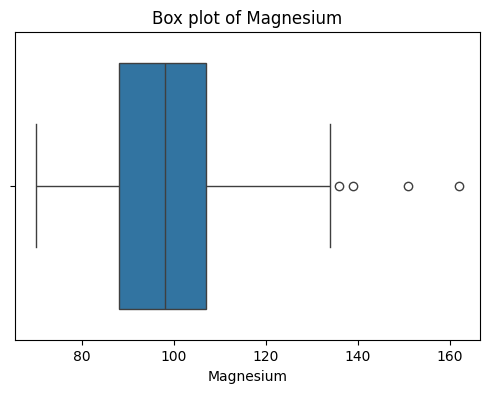

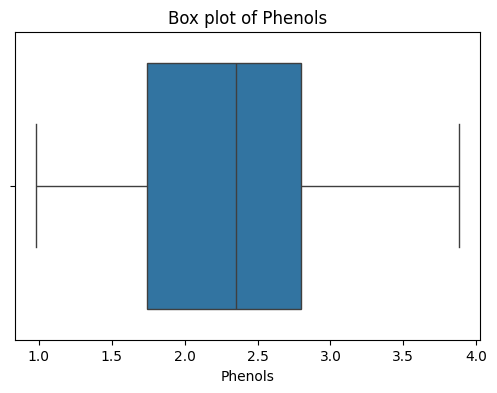

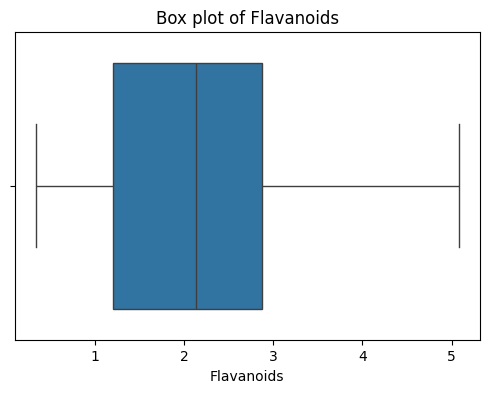

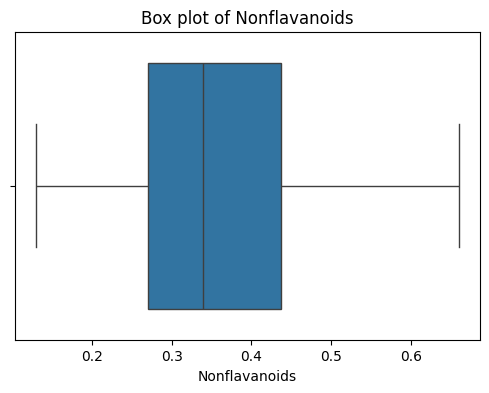

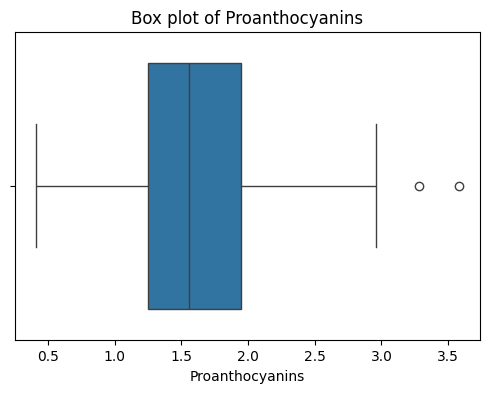

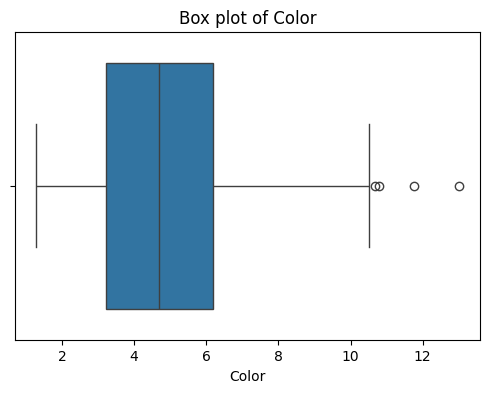

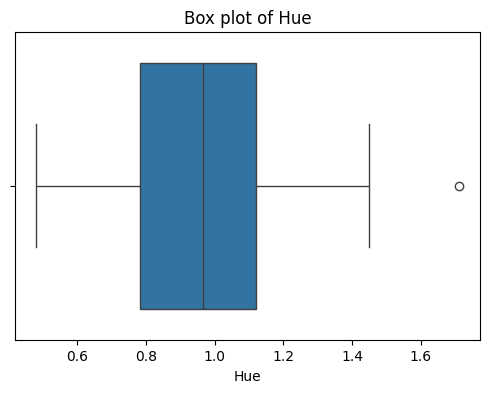

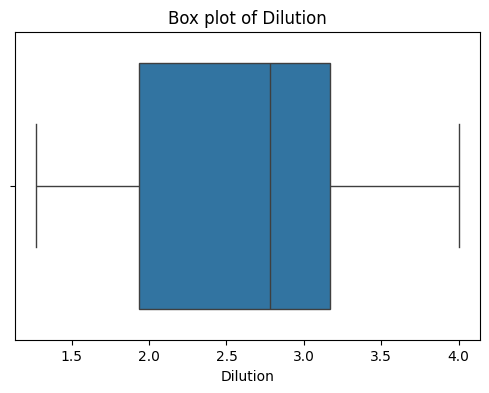

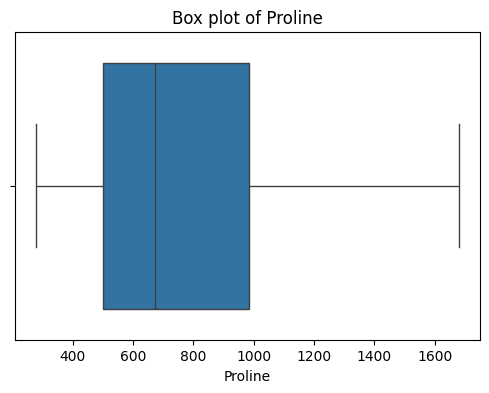

In [6]:
# Box plots
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Box plot of {column}")
    plt.show()

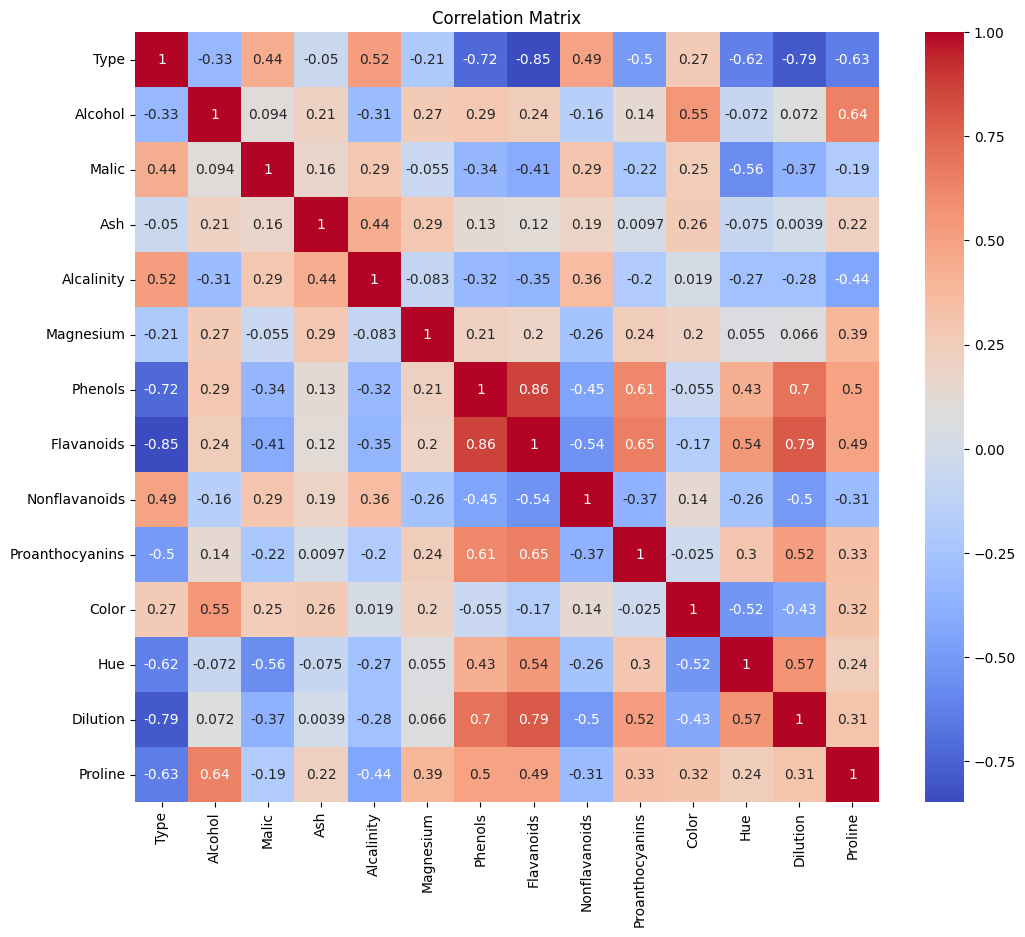

In [7]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Step 2: Dimensionality Reduction with PCA
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [9]:
# Apply PCA
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_

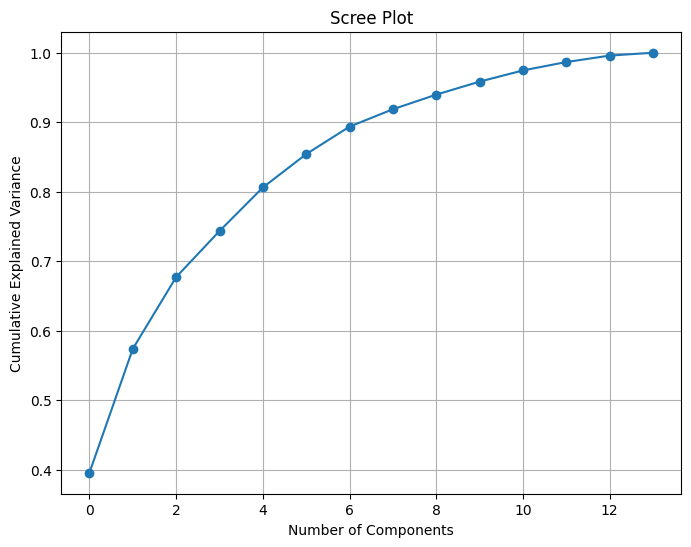

In [10]:
# Plot the explained variance to determine the number of components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [11]:
# Choosing number of components (e.g., retaining 95% of variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"\nOptimal number of components: {n_components}")


Optimal number of components: 10


In [12]:
# Transform the data using PCA
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

In [15]:
# Step 3: Clustering with Original Data
# Apply K-Means Clustering on original data
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
kmeans_labels = kmeans.fit_predict(scaled_data)

C:\Users\jammu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


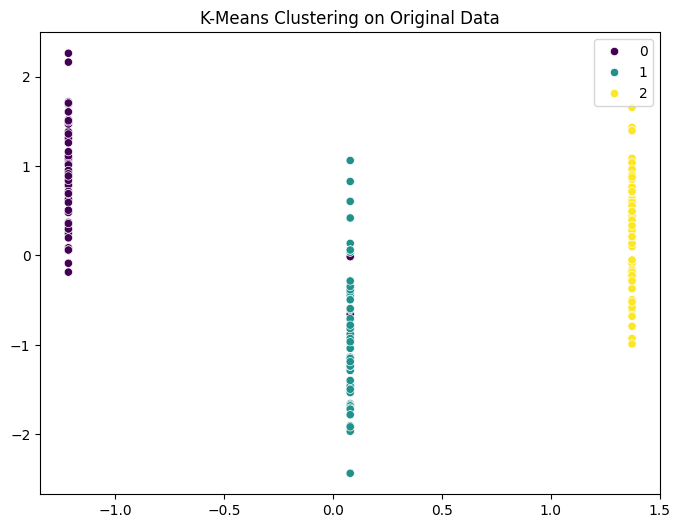

In [16]:
# Visualize Clustering Results on Original Data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering on Original Data")
plt.show()

In [17]:
# Evaluation of Clustering Performance
silhouette_original = silhouette_score(scaled_data, kmeans_labels)
davies_bouldin_original = davies_bouldin_score(scaled_data, kmeans_labels)
print("\nOriginal Data Clustering Performance:")
print(f"Silhouette Score: {silhouette_original}")
print(f"Davies-Bouldin Index: {davies_bouldin_original}")


Original Data Clustering Performance:
Silhouette Score: 0.30773604383565206
Davies-Bouldin Index: 1.3163957434114109


In [18]:
# Step 4: Clustering with PCA Data
# Apply K-Means Clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Using same number of clusters as before
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

C:\Users\jammu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


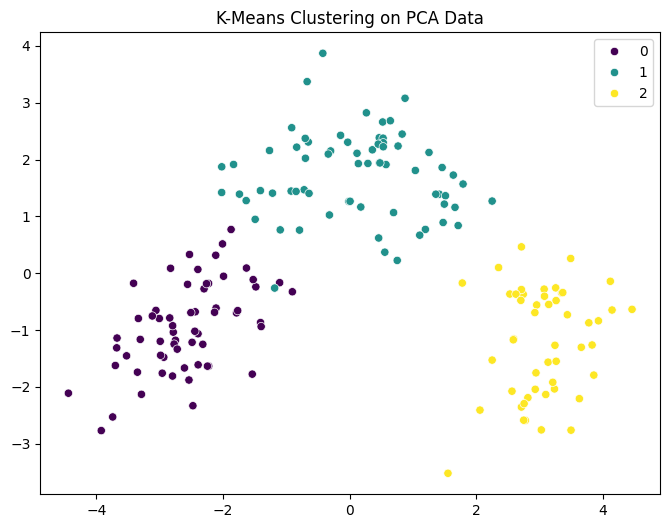

In [19]:
# Visualize Clustering Results on PCA Data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_pca_labels, palette='viridis')
plt.title("K-Means Clustering on PCA Data")
plt.show()

In [20]:
# Evaluation of Clustering Performance on PCA Data
silhouette_pca = silhouette_score(pca_data, kmeans_pca_labels)
davies_bouldin_pca = davies_bouldin_score(pca_data, kmeans_pca_labels)
print("\nPCA Data Clustering Performance:")
print(f"Silhouette Score: {silhouette_pca}")
print(f"Davies-Bouldin Index: {davies_bouldin_pca}")


PCA Data Clustering Performance:
Silhouette Score: 0.32406582053311866
Davies-Bouldin Index: 1.2584890242254974


In [21]:
# Step 5: Comparison and Analysis
print("\nComparison of Clustering Results:")
print(f"Silhouette Score - Original Data: {silhouette_original} | PCA Data: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original Data: {davies_bouldin_original} | PCA Data: {davies_bouldin_pca}")


Comparison of Clustering Results:
Silhouette Score - Original Data: 0.30773604383565206 | PCA Data: 0.32406582053311866
Davies-Bouldin Index - Original Data: 1.3163957434114109 | PCA Data: 1.2584890242254974


In [22]:
# Step 6: Conclusion and Insights
# Final output with a summary of observations and comparison between PCA and original clustering results
print("\nConclusion and Insights:")
print("1. PCA reduced the number of dimensions while retaining significant variance, helping with visualization and possibly improving clustering.")
print("2. K-Means clustering on PCA-transformed data generally reduces computational complexity and can yield comparable or improved clustering metrics.")
print("3. Dimensionality reduction with PCA can lead to faster and potentially more interpretable clustering results, particularly useful for high-dimensional datasets.")


Conclusion and Insights:
1. PCA reduced the number of dimensions while retaining significant variance, helping with visualization and possibly improving clustering.
2. K-Means clustering on PCA-transformed data generally reduces computational complexity and can yield comparable or improved clustering metrics.
3. Dimensionality reduction with PCA can lead to faster and potentially more interpretable clustering results, particularly useful for high-dimensional datasets.
